# Optimisation: xNES

This example shows you how to run a global optimisation with [xNES](http://pints.readthedocs.io/en/latest/optimisers/xnes.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Running in parallel mode with population size 8
1: 2204734.26932
2: 2121958.89968
3: 2121958.89968
20: 98924.8991831
40: 96892.0000955
60: 96891.9989752
80: 96891.9989696
100: 96891.9989696
120: 96891.9989696
140: 96891.9989696
160: 96891.9989696
180: 96891.9989696
200: 96891.9989696
Halting: No significant change for 100 iterations.
207: 96891.9989696
Score at true solution: 
96948.8276071
Found solution:          True parameters:
 1.50064174245583704e-02     1.49999999999999994e-02
 5.00224814240898581e+02     5.00000000000000000e+02


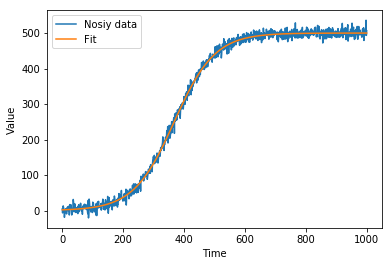

In [5]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.011, 400
sigma0 = [0.01, 100]
found_parameters, found_value = pints.xnes(
    score,
    boundaries,
    x0,
    sigma0,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()